# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


In [ ]:
# Since SGD updates parameters using only one data point per iteration,
# the learning rate becomes very important for stable training.

# A key issue with SGD is that consecutive data points can be very different,
# which may cause large fluctuations in the error function.

# If the learning rate is too high, a sudden large gradient can lead to
# overcorrection, making the algorithm skip over the minimum,
# especially when multiple local minima exist.

# Keeping the learning rate small is generally safer, as even large
# gradient changes will only slightly update the parameters.

# Another approach is to adjust the learning rate based on the size
# of the gradient change, so large gradients do not cause unstable jumps.



#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Real estate.csv")


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
np.random.seed(42)

def linear_regression_gd(X, y, lr, epochs):
    m, n = X.shape
    Xb = np.c_[np.ones((m, 1)), X]
    theta = np.zeros((n + 1, 1))

    for _ in range(epochs):
        error = Xb @ theta - y.reshape(-1, 1)
        gradient = (1 / m) * (Xb.T @ error)
        theta -= lr * gradient

    return theta

def linear_regression_sgd(X, y, lr, epochs):
    m, n = X.shape
    Xb = np.c_[np.ones((m, 1)), X]
    theta = np.zeros((n + 1, 1))

    for _ in range(epochs):
        for _ in range(m):
            i = np.random.randint(0, m)
            xi = Xb[i:i+1]
            yi = y[i:i+1]
            error = xi @ theta - yi
            theta -= lr * (xi.T @ error)

    return theta


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr_gd = linear_regression_gd(X_train, y_train, lr=0.01, epochs=1000)
lr_sgd = linear_regression_sgd(X_train, y_train, lr=0.001, epochs=1000)

Xb_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_gd = Xb_test @ lr_gd
y_sgd = Xb_test @ lr_sgd

mse_gd = mean_squared_error(y_test, y_gd)
r2_gd = r2_score(y_test, y_gd)
mse_sgd = mean_squared_error(y_test, y_sgd)
r2_sgd = r2_score(y_test, y_sgd)

print("Gradient Descent:")
print("MSE:", mse_gd)
print("R²:", r2_gd)
print()
print("Stochastic Gradient Descent:")
print("MSE:", mse_sgd)
print("R²:", r2_sgd)

Gradient Descent:
MSE: 66.90943297902047
R²: 0.6011591864880073

Stochastic Gradient Descent:
MSE: 52.94665649655928
R²: 0.684389978966806


In [ ]:
lr_sgd = linear_regression_sgd(X_train, y_train, lr=0.01, epochs=1000)
y_sgd = Xb_test @ lr_sgd
mse_sgd = mean_squared_error(y_test, y_sgd)
r2_sgd = r2_score(y_test, y_sgd)
print("Stochastic Gradient Descent:")
print("MSE:", mse_sgd)
print("R²:", r2_sgd)

Stochastic Gradient Descent:
MSE: 54.18440782106359
R²: 0.6770118601693318


In [ ]:
lr_sgd = linear_regression_sgd(X_train, y_train, lr=0.001, epochs=500)
y_sgd = Xb_test @ lr_sgd
mse_sgd = mean_squared_error(y_test, y_sgd)
r2_sgd = r2_score(y_test, y_sgd)
print("Stochastic Gradient Descent:")
print("MSE:", mse_sgd)
print("R²:", r2_sgd)

Stochastic Gradient Descent:
MSE: 53.151528130309025
R²: 0.6831687584985963


# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



In [ ]:
# a) A decision tree is a supervised learning algorithm
# because it is trained on labelled data to perform classification.


In [ ]:
# b) Entropy represents the amount of uncertainty in a dataset,
# indicating how likely the model is to make an incorrect prediction.


In [ ]:
# c) It measures how good a split is;
# a larger reduction means the data has been divided
# more effectively into two groups at that point.


d) Here the class label is positive and negative

Entropy at root = - (p+ log(p+) + p- log(p-))

 -(5/10 log 5/10 + 5/10 log 5/10) = -(log 1/2) = 1

  Split A -

  Left (x <= -2) = 0 as there are no positive on the left side

  Right (x > -2) = -(5/9 log 5/9 + 4/9 log 4/9) = 0.56 * 0.84 +
  0.44*1.16 = 0.47 + 0.51 = 0.98

  Overall = 0 * 1/10 + 0.98 * 9/10 = 0.88

  Split B -

  Left(x <= 2) = - (4/9 log 4/9 + 5/9 log 5/9) = 0.98

  Right(x > 2) = 0 as no negatives

  Overall = 0.98 * 9/10 + 0 * 1/10 = 0.88

  Split C -

  Left(y <= 2) = 5 points on each side = - (4/5 log 4/5 + 1/5 log 1/5) = 0.8 * 0.32 + 0.2 * 2.32 = 0.26 + 0.46 = 0.72

  Right(y > 2) = 0.72

  Overall = 0.72 * 5/10 + 0.72 * 5/10 = 0.72

  Reductions -

  A - 0.12, B - 0.12, C - 0.28

  C is optimal because most reduction


### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


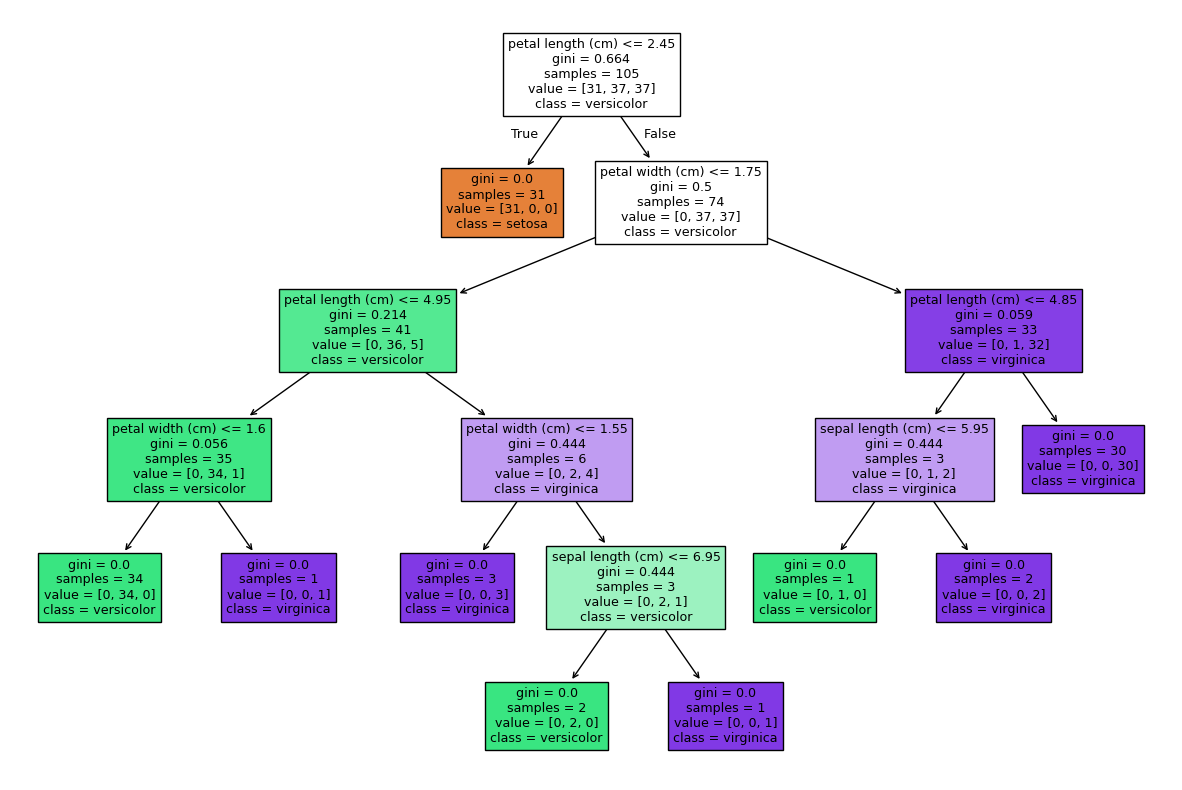

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



In [ ]:
# a) SVM is a supervised learning algorithm because it learns
# from labelled data to perform classification or regression.

# It works by finding a decision boundary that separates
# the data points for the classification task.


In [ ]:
# b) Margin is the distance between the hyperplane which acts as the decision boundary to the closest data points from each class.

# SVM aims to maximise the margin as it reduces the risk of overfitting, analogous to choosing multiple neighbours in KNN
# This makes sure that we are not actually doing something like a squiggly line to fit only the training data and fail on testing.

In [ ]:
# c) Support vectors are the data points closest to the decision boundary,
# and they are the ones that determine the position of the hyperplane.

# If these points are removed, the decision boundary would change,
# since the remaining points are farther away and easier to separate.

# They are similar to edge cases in a coding problem—without them,
# the data becomes much easier to analyze and classify.


In [ ]:
# d) Kernel functions enable SVMs to work with data that is
# not linearly separable by mapping it to a higher-dimensional space.

# Commonly used kernels include the Linear kernel
# and the Radial Basis Function (RBF) kernel.


### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

In [ ]:
# a) It aims to maximise the margin, chooses the one with the largest margin.

In [ ]:
# b) When the data is not linearly separable,
# a clear decision boundary cannot be formed in 2D.

# In such cases, the kernel trick is used to map the data
# to a higher-dimensional space where a hyperplane can be found,
# and this boundary is then effectively represented back in 2D.


In [ ]:
# c) It helps control overfitting and underfitting in the model.
# The goal is to maximize the margin while keeping
# classification errors reasonably low.

# When C is very large, even small misclassifications
# are heavily penalized, leading to a smaller margin
# and a higher risk of overfitting.

# When C is very small, the model allows more errors,
# resulting in overly generalized predictions,
# which leads to underfitting.
v